# 互评作业2: 频繁模式与关联规则挖掘
选用数据集为wine

In [1]:
import numpy as np 
import pandas as pd

## 对数据集进行处理，转换成适合进行关联规则挖掘的形式
读取数据，并去除数据中的缺失值

In [12]:
data = pd.read_csv('./data/Wine Reviews/winemag-data-130k-v2.csv')
data =data.dropna()
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


从中我们可以看到points和price为数值属性，我们将其离散化

In [13]:
number_data = ['points','price']
data[number_data].describe()

,points,price
count,22387.000000,22387.000000
mean,89.537812,41.465404
std,2.809306,29.379374
min,80.000000,4.000000
25%,88.000000,25.000000
50%,90.000000,36.000000
75%,92.000000,50.000000
max,100.000000,2013.000000


根据五数概括，我们将points和price分成4个等级，points为低度，中低度,中度，高度，pirce为低价，中低价，中价，高价

points 0-88 88-90 90-92 92-100

price  0-25 25-36 36-50 50-2013 

经过处理后的结果如下所示

In [14]:
bin = [0,88,90,92,100]
data['points'] = pd.cut(data['points'],bin)
data['points'] = data['points'].astype('str')
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,"(0, 88]",65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,"(0, 88]",19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,"(0, 88]",22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,"(0, 88]",69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,"(0, 88]",50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


In [15]:
bin = [0,25,36,50,2013]
data['price'] = pd.cut(data['price'],bin)
data['price'] = data['price'].astype('str')
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,"(0, 88]","(50, 2013]",Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,"(0, 88]","(0, 25]",California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,"(0, 88]","(0, 25]",California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,"(0, 88]","(50, 2013]",California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,"(0, 88]","(36, 50]",Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


选取points,price,country以及winery进行挖掘

In [16]:
data = data[['points','price','country','winery']]
data.head(5)

,points,price,country,winery
4,"(0, 88]","(50, 2013]",US,Sweet Cheeks
10,"(0, 88]","(0, 25]",US,Kirkland Signature
23,"(0, 88]","(0, 25]",US,Bianchi
25,"(0, 88]","(50, 2013]",US,Castello di Amorosa
35,"(0, 88]","(36, 50]",US,Erath


## 找出频繁模式

利用Apriori算法找出所有的频繁项集

In [24]:
def createC1( dataSet ):
    C1 = []
    for transaction in np.array(dataSet):
        for item in transaction:
            if [item] not in C1:
                C1.append( [item] )
    C1.sort()
    return list(map( frozenset, C1 ))

def scanD( D, Ck, minSupport ):
    ssCnt = {}
    for tid in D:
        if Ck is not None:
            for can in Ck:
                if can.issubset( tid ):
                    ssCnt[ can ] = ssCnt.get( can, 0) + 1
    numItems = float( len( D ) )
    retList = []
    supportData = {}
    for key in ssCnt:
        support = ssCnt[ key ] / numItems
        if support >= minSupport:
            retList.insert( 0, key )
            supportData[ key ] = support
    return retList, supportData

In [25]:
def aprioriGen( Lk, k ):
    retList = []
    lenLk = len( Lk )
    for i in range( lenLk ):
        for j in range( i + 1, lenLk ):
            L1 = list( Lk[ i ] )[ : k - 2 ];
            L2 = list( Lk[ j ] )[ : k - 2 ];
            L1.sort();L2.sort()    
            if L1==L2:
                retList.append( Lk[ i ] | Lk[ j ] ) 
    return retList

def apriori( dataSet, minSupport = 0.5 ):
    C1 = createC1( dataSet )
    D =list( map( set, dataSet ))
    L1, suppData = scanD( D, C1, minSupport )
    L = [ L1 ]
    k = 2
    
    while ( len( L[ k - 2 ] ) > 0 ):
        Ck = aprioriGen( L[ k - 2 ], k )
        Lk, supK = scanD( D, Ck, minSupport )
        suppData.update( supK )
        L.append( Lk )
        k += 1
    return L, suppData

所有的频繁项集如下所示

In [26]:
newData = list(map(set,np.array(data)))
L, suppData = apriori(newData, 0.05)
L

[[frozenset({'(92, 100]'}),
  frozenset({'(88, 90]'}),
  frozenset({'(90, 92]'}),
  frozenset({'(25, 36]'}),
  frozenset({'(36, 50]'}),
  frozenset({'(0, 25]'}),
  frozenset({'US'}),
  frozenset({'(50, 2013]'}),
  frozenset({'(0, 88]'})],
 [frozenset({'(50, 2013]', '(92, 100]'}),
  frozenset({'(92, 100]', 'US'}),
  frozenset({'(36, 50]', '(88, 90]'}),
  frozenset({'(0, 25]', '(88, 90]'}),
  frozenset({'(25, 36]', '(88, 90]'}),
  frozenset({'(88, 90]', 'US'}),
  frozenset({'(36, 50]', '(90, 92]'}),
  frozenset({'(25, 36]', '(90, 92]'}),
  frozenset({'(50, 2013]', '(90, 92]'}),
  frozenset({'(90, 92]', 'US'}),
  frozenset({'(0, 88]', '(25, 36]'}),
  frozenset({'(25, 36]', 'US'}),
  frozenset({'(0, 88]', '(36, 50]'}),
  frozenset({'(36, 50]', 'US'}),
  frozenset({'(0, 25]', '(0, 88]'}),
  frozenset({'(0, 25]', 'US'}),
  frozenset({'(0, 88]', 'US'}),
  frozenset({'(50, 2013]', 'US'})],
 [frozenset({'(50, 2013]', '(92, 100]', 'US'}),
  frozenset({'(36, 50]', '(88, 90]', 'US'}),
  frozenset(

## 导出关联规则，计算其支持度和置信度，并对规则进行评价

In [29]:
for tmp, num in suppData.items():
    print(tmp, ':', num)

frozenset({'(0, 88]'}) : 0.3699468441506231
frozenset({'(50, 2013]'}) : 0.23187564211372672
frozenset({'US'}) : 1.0
frozenset({'(0, 25]'}) : 0.2844061285567517
frozenset({'(36, 50]'}) : 0.25318265064546386
frozenset({'(25, 36]'}) : 0.23053557868405772
frozenset({'(90, 92]'}) : 0.24514227006744985
frozenset({'(88, 90]'}) : 0.23719122705141377
frozenset({'(92, 100]'}) : 0.14771965873051324
frozenset({'(50, 2013]', 'US'}) : 0.23187564211372672
frozenset({'(0, 88]', 'US'}) : 0.3699468441506231
frozenset({'US', '(0, 25]'}) : 0.2844061285567517
frozenset({'(0, 88]', '(0, 25]'}) : 0.18064055031938178
frozenset({'US', '(36, 50]'}) : 0.25318265064546386
frozenset({'(0, 88]', '(36, 50]'}) : 0.06222361191763077
frozenset({'(25, 36]', 'US'}) : 0.23053557868405772
frozenset({'(0, 88]', '(25, 36]'}) : 0.09501049716353241
frozenset({'US', '(90, 92]'}) : 0.24514227006744985
frozenset({'(50, 2013]', '(90, 92]'}) : 0.07450752668959663
frozenset({'(25, 36]', '(90, 92]'}) : 0.055165944521374015
frozenset(

In [40]:
#输入频繁项集列表、频繁项集的支持度字典、最小置信度
#输出包含置信度的规则列表
def generateRules(L, supportData, minConf=0.5):
    bigRuleList = []
    for i in range(1, len(L)):
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]   #规则后件集合
            if (i > 1):
                rulesFromConseq(freqSet, H1, supportData, bigRuleList, minConf)
            else:
                calcConf(freqSet, H1, supportData, bigRuleList, minConf)
    return bigRuleList

#生成候选规则集合
def calcConf(freqSet, H, supportData, brl, minConf=0.5):
    prunedH = []
    for conseq in H:
        conf = supportData[freqSet]/supportData[freqSet-conseq]   #集合相减
        if conf >= minConf:
            print(f'{freqSet-conseq} --> {conseq} conf:{conf}'+ "  support: "+ str(supportData[freqSet]))
            brl.append((freqSet-conseq, conseq, conf, supportData[freqSet]))
            prunedH.append(conseq)
    return prunedH

#对规则进行评估
def rulesFromConseq(freqSet, H, supportData, brl, minConf=0.5):
    m = len(H[0])
    if (len(freqSet) > (m + 1)):
        Hmp1 = aprioriGen(H, m+1)
        Hmp1 = calcConf(freqSet, Hmp1, supportData, brl, minConf)
        if (len(Hmp1) > 1):
            rulesFromConseq(freqSet, Hmp1, supportData, brl, minConf)

In [44]:
rules = generateRules(L, suppData, minConf=0.05)

frozenset({'(92, 100]'}) --> frozenset({'(50, 2013]'}) conf:0.5624433020864833  support: 0.08308393263947828
frozenset({'(50, 2013]'}) --> frozenset({'(92, 100]'}) conf:0.358312463879792  support: 0.08308393263947828
frozenset({'(92, 100]'}) --> frozenset({'US'}) conf:1.0  support: 0.14771965873051324
frozenset({'US'}) --> frozenset({'(92, 100]'}) conf:0.14771965873051324  support: 0.14771965873051324
frozenset({'(36, 50]'}) --> frozenset({'(88, 90]'}) conf:0.24558927311220893  support: 0.0621789431366418
frozenset({'(88, 90]'}) --> frozenset({'(36, 50]'}) conf:0.2621468926553672  support: 0.0621789431366418
frozenset({'(0, 25]'}) --> frozenset({'(88, 90]'}) conf:0.23810271713522854  support: 0.06771787197927369
frozenset({'(88, 90]'}) --> frozenset({'(0, 25]'}) conf:0.28549905838041434  support: 0.06771787197927369
frozenset({'(25, 36]'}) --> frozenset({'(88, 90]'}) conf:0.2823096299166828  support: 0.06508241390092465
frozenset({'(88, 90]'}) --> frozenset({'(25, 36]'}) conf:0.2743879

以上就是关联规则及其置信度和支持度

### 利用Lift进行评价

In [57]:
def getlift(rules, suppData):
    lift = []
    for rule in rules:
        freqSet_conseq = rule[0]
        conseq = rule[1]
        lift_val = float(rule[3]) / float(suppData[rule[1]])
        lift.append([freqSet_conseq, conseq, lift_val])
    return lift

In [59]:
lift = getlift(rules, suppData)
lift

[[frozenset({'(92, 100]'}), frozenset({'(50, 2013]'}), 0.358312463879792],
 [frozenset({'(50, 2013]'}), frozenset({'(92, 100]'}), 0.5624433020864833],
 [frozenset({'(92, 100]'}), frozenset({'US'}), 0.14771965873051324],
 [frozenset({'US'}), frozenset({'(92, 100]'}), 1.0],
 [frozenset({'(36, 50]'}), frozenset({'(88, 90]'}), 0.2621468926553672],
 [frozenset({'(88, 90]'}), frozenset({'(36, 50]'}), 0.24558927311220893],
 [frozenset({'(0, 25]'}), frozenset({'(88, 90]'}), 0.28549905838041434],
 [frozenset({'(88, 90]'}), frozenset({'(0, 25]'}), 0.23810271713522854],
 [frozenset({'(25, 36]'}), frozenset({'(88, 90]'}), 0.2743879472693032],
 [frozenset({'(88, 90]'}), frozenset({'(25, 36]'}), 0.2823096299166828],
 [frozenset({'US'}), frozenset({'(88, 90]'}), 1.0],
 [frozenset({'(88, 90]'}), frozenset({'US'}), 0.23719122705141377],
 [frozenset({'(36, 50]'}), frozenset({'(90, 92]'}), 0.34402332361516036],
 [frozenset({'(90, 92]'}), frozenset({'(36, 50]'}), 0.3330980945659845],
 [frozenset({'(90, 92

### 利用全自信度进行评价

In [62]:
def all_confidence(rules,suppData):
    num = []
    for rule in rules:
        A = rule[0]
        B = rule[1]
        k = suppData[B]/max(suppData[A],suppData[B-A])
        num.append([A, B, k])
    return num

In [64]:
all_conf = all_confidence(rules, suppData)
all_conf

[[frozenset({'(92, 100]'}), frozenset({'(50, 2013]'}), 1.0],
 [frozenset({'(50, 2013]'}), frozenset({'(92, 100]'}), 0.6370641494895011],
 [frozenset({'(92, 100]'}), frozenset({'US'}), 1.0],
 [frozenset({'US'}), frozenset({'(92, 100]'}), 0.14771965873051324],
 [frozenset({'(36, 50]'}), frozenset({'(88, 90]'}), 0.9368383909668314],
 [frozenset({'(88, 90]'}), frozenset({'(36, 50]'}), 1.0],
 [frozenset({'(0, 25]'}), frozenset({'(88, 90]'}), 0.8339877493324956],
 [frozenset({'(88, 90]'}), frozenset({'(0, 25]'}), 1.0],
 [frozenset({'(25, 36]'}), frozenset({'(88, 90]'}), 1.0],
 [frozenset({'(88, 90]'}), frozenset({'(25, 36]'}), 0.971939736346516],
 [frozenset({'US'}), frozenset({'(88, 90]'}), 0.23719122705141377],
 [frozenset({'(88, 90]'}), frozenset({'US'}), 1.0],
 [frozenset({'(36, 50]'}), frozenset({'(90, 92]'}), 0.9682427664079041],
 [frozenset({'(90, 92]'}), frozenset({'(36, 50]'}), 1.0],
 [frozenset({'(90, 92]'}), frozenset({'(25, 36]'}), 0.9404154518950438],
 [frozenset({'(25, 36]'}), 

## 对挖掘结果进行可视化分析
我们对置信度和支持度进行可视化

In [89]:
import matplotlib.pyplot as plt

def show(x,y,title,K):
    plt.figure(figsize=(12,5)) 
    plt.xticks(rotation=270)
    plt.bar(x=x, height=y, label='d', color='steelblue', alpha=1)
    for xx, yy in zip(x, y):
        plt.text(xx, yy, str(yy), ha='center', va='bottom', fontsize=10, rotation=0)
    plt.title(title)
    plt.xlabel("rule")
    plt.ylabel(K)
    plt.show()

In [90]:
rule = []
sup = []
conf = []
for tmp in rules[:15]:
    rule.append(str(tmp[0])+"->"+str(tmp[1]))
    conf.append(round(tmp[2], 2))
    sup.append(round(tmp[3], 2))

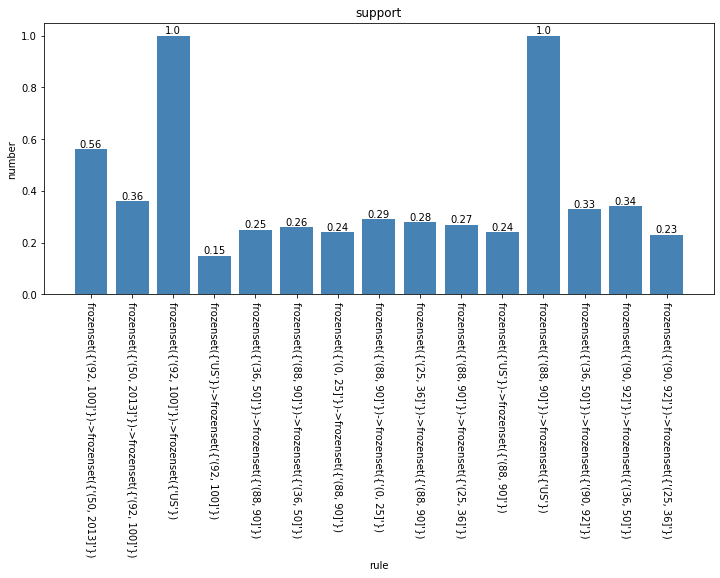

In [92]:
show(rule,conf,"support","number")

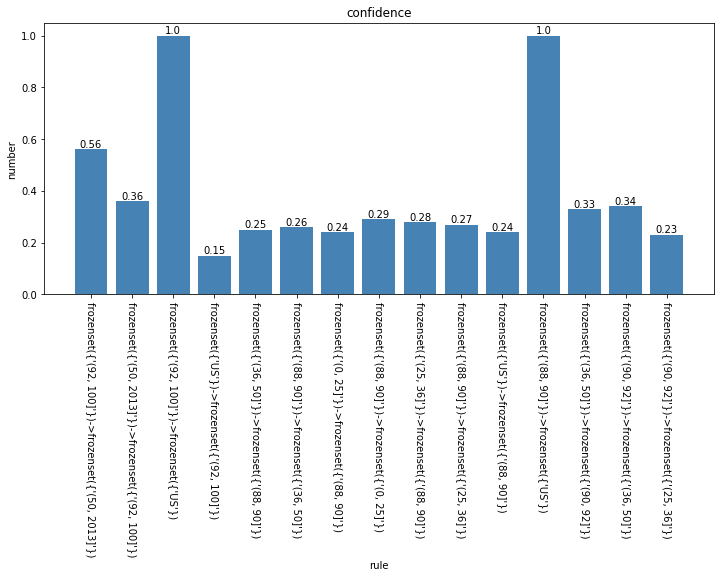

In [91]:
show(rule,conf,"confidence","number")

我们发现（92，100]->'US' 和（88，90]->'US'有较高的置信度，说明高价酒为美国的产地比较高